In [9]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

boston_df=pd.read_csv(boston_url)







In [11]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [17]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


**2.1 Median value of owner occupied homes**

Text(0.5, 1.0, 'Median Value of owner occupied homes')

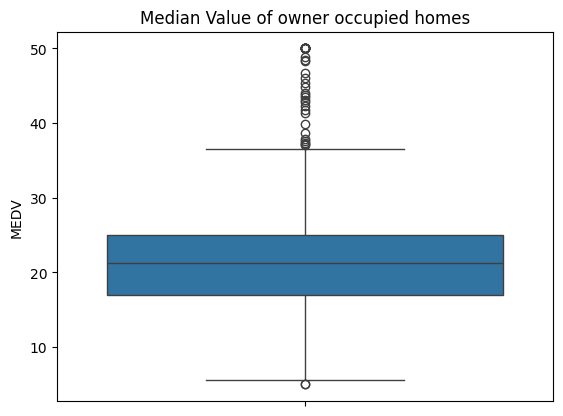

In [41]:
ex1=sns.boxplot (y = 'MEDV', data=boston_df)
ex1.set_title('Median Value of owner occupied homes')

**2.2 Bar chart for Charles River Variable**

Text(0.5, 1.0, 'Charles River Variable')

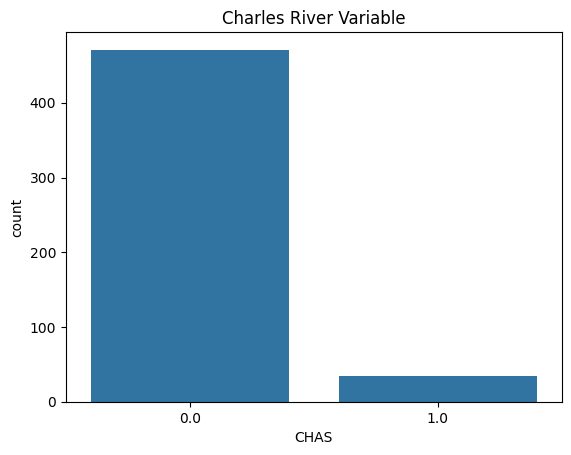

In [42]:
ex2=sns.countplot (x = 'CHAS', data=boston_df)
ex2.set_title('Charles River Variable')

**2.3 Box Plot MEDV variable vs the AGE variable**

[Text(0.5, 0, 'Proportion of owner occupied units built prior to 1940'),
 Text(0, 0.5, 'Median value of owner-occupied homes in $1000s'),
 Text(0.5, 1.0, 'MEDV variable vs AGE variable')]

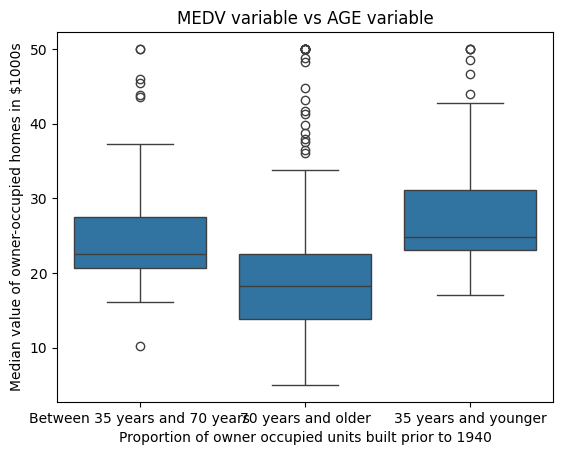

In [35]:
boston_df.loc[boston_df['AGE'] <= 35, 'Age Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] >35) & (boston_df['AGE'] <70), 'Age Group'] = 'Between 35 years and 70 years'
boston_df.loc[boston_df['AGE'] >=70, 'Age Group'] = '70 years and older'

ex3=sns.boxplot (x = 'Age Group', y = 'MEDV', data=boston_df)
ex3.set(xlabel='Proportion of owner occupied units built prior to 1940',ylabel='Median value of owner-occupied homes in $1000s',title= 'MEDV variable vs AGE variable')

**2.4 Scatter Plot relationship between nitric oxide concentrations and the proportion of non-retail business acres per town**

[Text(0.5, 0, 'Nitric oxide concentrations'),
 Text(0, 0.5, 'Proportion of non-retail business acres per town'),
 Text(0.5, 1.0, 'Relationship between nitric oxide concentrations and the proportion of non-retail business acres per town')]

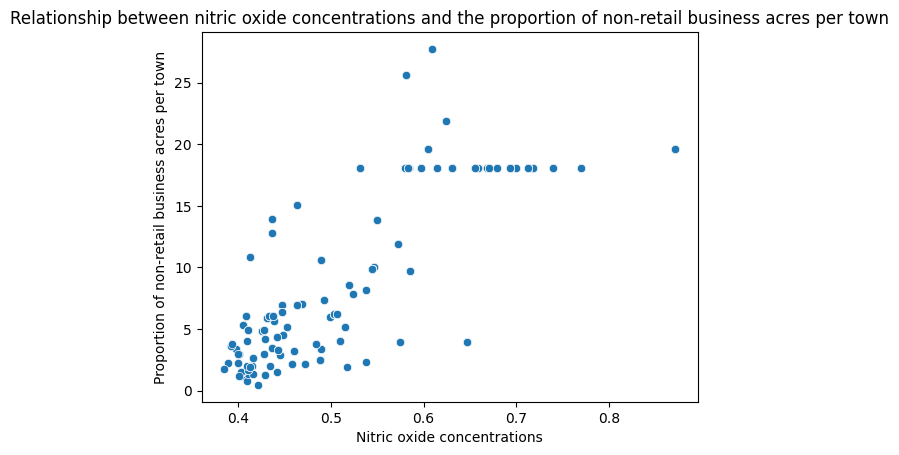

In [40]:
ex4=sns.scatterplot(x='NOX',y='INDUS',data=boston_df)
ex4.set(xlabel='Nitric oxide concentrations',ylabel='Proportion of non-retail business acres per town',title='Relationship between nitric oxide concentrations and the proportion of non-retail business acres per town') 

**2.5 Histogram pupil to teacher ratio**

[Text(0.5, 0, 'Pupil teacher ratio by town'),
 Text(0, 0.5, 'Frequency of pupil teacher by town'),
 Text(0.5, 1.0, 'Histogram of pupil to teacher ratio')]

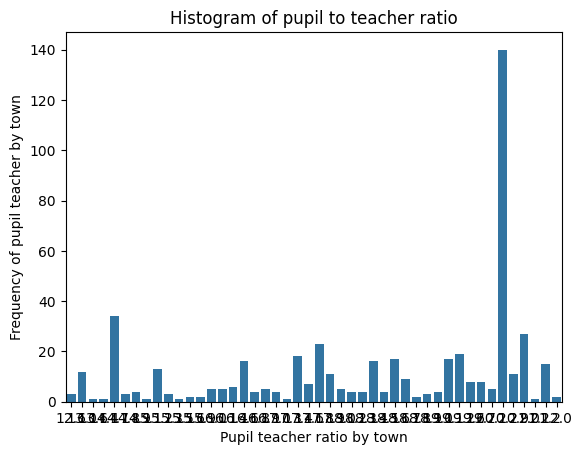

In [43]:
ex5=sns.countplot(x='PTRATIO',data=boston_df)
ex5.set(xlabel='Pupil teacher ratio by town',ylabel='Frequency of pupil teacher by town',title='Histogram of pupil to teacher ratio')

**3.1- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

Hypothesis:
H0 - no significant different in median value,
H1 - significant different in median value

In [73]:
notbounded=boston_df.loc[(boston_df['CHAS']==0),'CHAS_T']='not bounded'
bounded=boston_df.loc[(boston_df['CHAS']==1),'CHAS_T']='bounded'

In [74]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS_T'] == 'not bounded']['MEDV'],
                   boston_df[boston_df['CHAS_T'] == 'bounded']['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

The p value is higher than 0.05 - no significant difference

**3.2 - Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

Hypothesis: H0 no difference in median values, H1 difference in median values

In [82]:
boston_df.loc[boston_df['AGE'] <= 35, 'Age Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] >35) & (boston_df['AGE'] <70), 'Age Group'] = 'Between 35 years and 70 years'
boston_df.loc[boston_df['AGE'] >=70, 'Age Group'] = '70 years and older'

tothirtyfive=boston_df[boston_df['Age Group'] == '35 years and younger']['MEDV']
thirtyfivetoseventy=boston_df[boston_df['Age Group'] == 'Between 35 years and 70 years']['MEDV']
seventyover=boston_df[boston_df['Age Group'] == '70 years and older']['MEDV']

f_statistic,p_value=scipy.stats.f_oneway(tothirtyfive,thirtyfivetoseventy,seventyover)
print('F_Statistic:{0}, P-Value:{1}'.format(f_statistic,p_value))


F_Statistic:36.40764999196599, P-Value:1.7105011022702984e-15


The p value is higher than 0.05 therefore we conclude that there is no difference

**3.3 - Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

Hypothesis: H0 - nitric oxide not correlated, H1 - nitric oxide correlated

In [83]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

No correlation between nitric oxide and non retail business acres per town

**3.4 - What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

Hypothesis: H0 - no impact on the median value of the owner occupier home, H1 - has an impact on the median value of the owner occupier home

In [93]:
x=boston_df['DIS']
y=boston_df['MEDV']
X=sm.add_constant(x)
model=sm.OLS(y,X).fit()
predictions=model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        13:50:51   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p value is less than the 0.05 value so we reject the null hypothesis as there is evidence thet it has an impact on the median value